# **Unsupervised Learning with K-Means Clustering**

In this lab, you will get an introduction to unsupervised learning by solving a clustering problem using **K-Means Clustering**.





Please open [this tutorial](https://youtu.be/EItlUEPCIzM) to follow the steps in this notebook.This is a 25 minutes tutorial, in which you will learn how to determine the number of clusters needed for a data set and how to use the K-Means method for clustering.



**Saturn shortcuts**

Press *Ctrl+return* to run each section separately. Please note that some sections depend on the previous sections, and run them in order. You can run the whole program at once, buy clicking the *Run All* button.

---

# Theory: The K-Means algorithm



0. Set *K*, the value that determines the number of clusters to be created
1. Start with *K* centroids by putting them at a random place
2. Compute distance of every point from centroid and cluster the points accordingly
3. Adjust centroids so that they become center of gravity for their cluster
4. Re-cluster every point based on their distance to the centroid
5. Readjust centroids to make them the center of gravity
6. Recompute clusters and repeat this till data points stop changing clusters


***Check point***

What's the name of the algorithm commony used to determine the value of K?

Elbow Method.



---


# Practice: Clustering a data set

The data set in the tutorial contains age and income information of a given population.

The data file, *income.csv* is provided for you in this directory.

# Import packages

In [3]:
# Importing packages needed in this code, from sklearn, pandas, and matplotlib
# ---------------------------------------------------------------------------- #
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

# Explore the data set

1. Read in the data set

In [13]:
# Using pandas to read in the input file, income.csv saved under UnsupervisedLearning.
# The data file is saved in the variable 'df'
df = pd.read_csv('UnsupervisedLearning/income.csv')

#TODO: Write code to inspect the first five rows of the data set by using the head function 
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


2. Plot data on a scatter plot

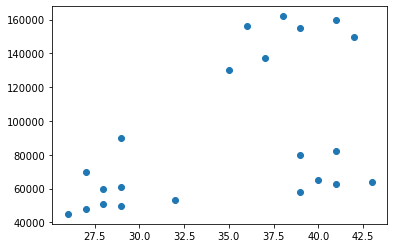

In [6]:
# Generate a scatter plot of age and income
plt.scatter(df['Age'],df['Income($)'])

# Fit and predict three clusters for the data

In [31]:
# Define a KMeans object with 3 as the value of k. Call the object km
km = KMeans(n_clusters=3)

#TODO: Write code to inspect km to see all the default parameters that we didn't have to specify
km

KMeans(n_clusters=3)

In [32]:
# Predict the data set excluding the name column. 
# Save the prediction in an array and call it y_predicted
y_predicted = km.fit_predict(df[['Age','Income($)']])

# Visualize the array. 
# Notice that every element is assigned one of the three cluster IDs: 0, 1, or 2
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

Printing out the y_predicted array is not the best way to visualize the clustering. A better option would be to plot the clusters.

In [33]:
# Add a column to the data frame to store the predicted cluster ID of each element
df['Cluster'] = y_predicted

#TODO: Write code to inspect the first five rows of the data set by using the head() function
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


Plot the clusters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


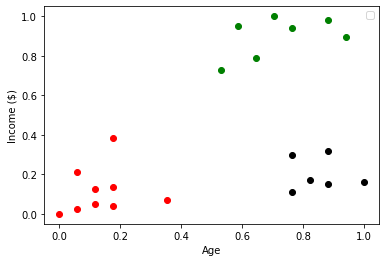

In [35]:
# Define the three data frames, df1, df2, df3, each belonging to one of the three clusters
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

# Plot the data frames with different colors to differentiate them
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

# Define the labels on the x and y axes
plt.xlabel('Age')
plt.ylabel('Income ($)')

# Plot the legend
plt.legend()

Due to scaling, cluster 1 and 2 were not clusteried correctly. To correct this, we get to use the *MinMaxScaler* algorithm to normalize the data.

In [36]:
# Define the MinMaxScaler object and save in a variable called scaler
scaler = MinMaxScaler()

# Scale the income feature
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

# Scale the age feature
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

#TODO: Write code to inspect the scaled values of age and income.
# Notice that all the values are between 0 and 1
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


With the scaled values in df, we can repeat the steps to fit and predict the data set.

In [37]:
# Define a KMeans object with 3 as the value of k. Call the object km
km = KMeans(n_clusters=3)

# Predict the data set excluding the name column. 
# Save the prediction in an array and call it y_predicted
y_predicted = km.fit_predict(df[['Age','Income($)']])

# Visualize the array.
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [41]:
# Add a column to the data frame to store the predicted cluster ID of each element
df['Cluster'] = y_predicted
#df.drop('cluster',axis='columns',inplace=True)

#TODO: Write code to inspect the first five rows of the data set by using the head() function
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


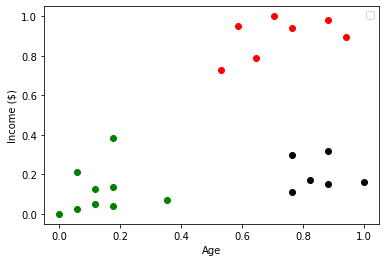

In [42]:
# Define the three data frames, df1, df2, df3, each belonging to one of the three clusters
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

# Plot the data frames with different colors to differentiate them
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

# Define the labels on the x and y axes
plt.xlabel('Age')
plt.ylabel('Income ($)')

# Plot the legend
plt.legend()

Add the cluster centroids to to the plot

In [0]:
# Inspect the cluster centroids which are saved inside cluster_centers_ 
km.cluster_centers_

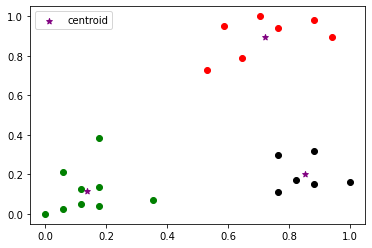

In [43]:
# Define the three data frames, df1, df2, df3, each belonging to one of the three clusters
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

# Plot the data frames with different colors to differentiate them
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

# Add the centroids to the plot
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
# Plot the legend
plt.legend()

# The elbow method

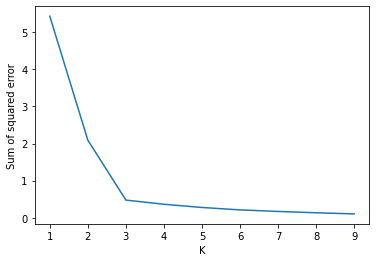

In [46]:
# Define a range for possible k values. In this example, we choose 1 to 10
k_rng = range(1,10)

# Declare an array to store the values from the sum of squared error values.
sse = []

# Using a for loop, go through each value in the k range and compute the sse value
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

# Plot the sse value for each k.
# Notice that 3 is the elbow value.
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Earn Your Wings: The iris flower

![alt text](https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/iris.png)


Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.

Figure out if any preprocessing such as scaling would help here.

Draw elbow plot and from that figure out optimal value of k